<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica22_SergioTrejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Sergio Trejo
*   Matrícula: 261539
* Enlace Repositorio Github: https://github.com/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica22_SergioTrejo.ipynb

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Primeras filas del DataFrame: 
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Descripcion estadistica del conjunto de datos: 
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
Valores nulos: 
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


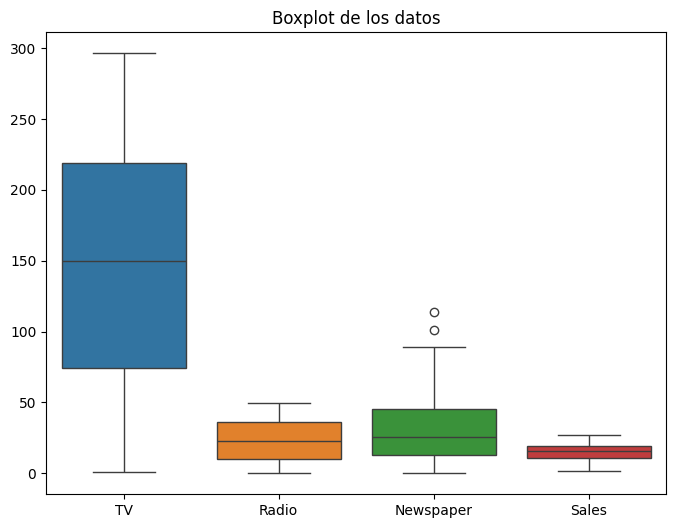

In [40]:
# Tu código aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import scipy.stats as stats

#Cargar archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')
#Mostrar las primeras filas del df
print('Primeras filas del DataFrame: ')
print(df.head())

#Descripcion estadistica del conjunto de datos
print('Descripcion estadistica del conjunto de datos: ')
print(df.describe())
#verificacion de valores nulos
print('Valores nulos: ')
print(df.isnull().sum())

#Revision visual de outliers con boxplots
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.title('Boxplot de los datos')
plt.show()


**Interpretacion**

* El conjunto de datos tiene 4 variables numericas. Tres independientes (TV, Radio y Newspaper) y una dependiente (Sales).

* La inversion en TV es la mas alta y variable con un promedio de 147.04. Mientras que Radio y Newspaper tienes valores mas bajos.

* Las ventas promedio son de 15.13.

* No hay valores nulos  y los datos muestran algo de dispersion especialmente para TV lo que muestra que hubo mayor inversion que otras.

* No hay valores nulos

## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

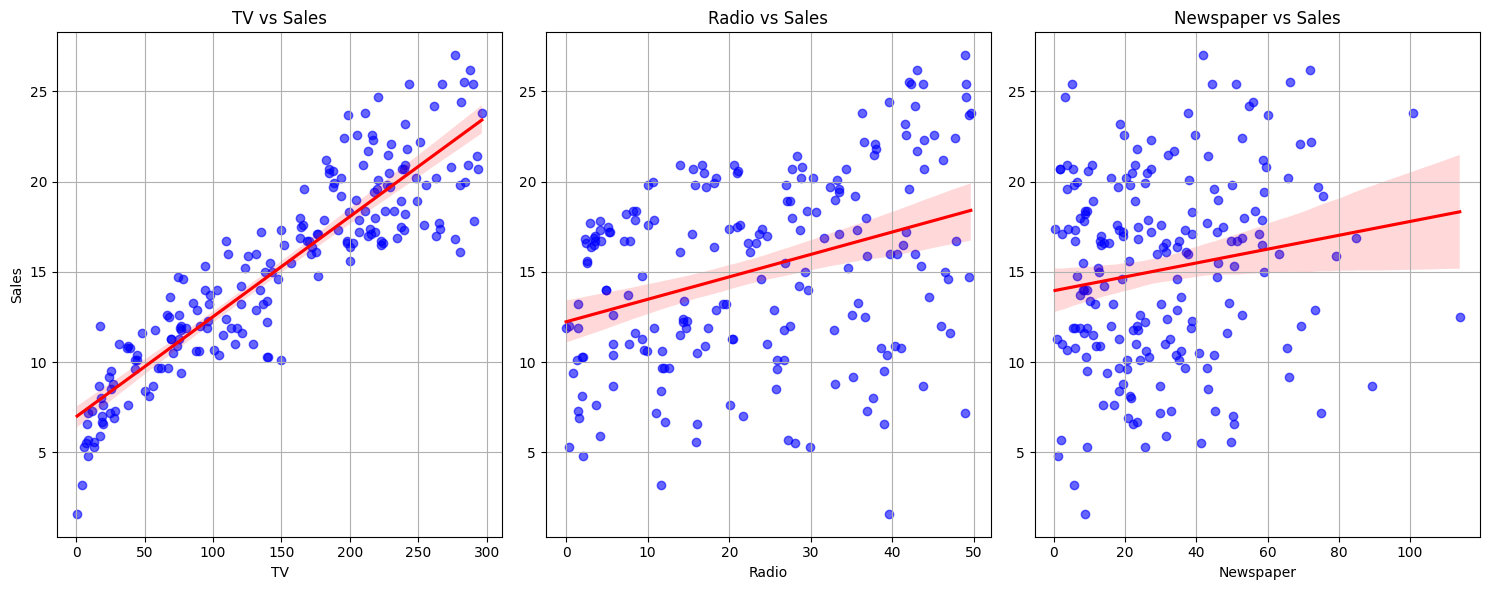

In [20]:
# Gráficos de dispersión
# TV
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=df, scatter_kws={'color':'blue', 'alpha':0.6}, line_kws={'color':'red'})
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)

# Radio
plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=df, scatter_kws={'color':'blue', 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('')
plt.grid(True)

# Newspaper
plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=df, scatter_kws={'color':'blue', 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('')
plt.grid(True)

plt.tight_layout()
plt.show()


**Interpretacion**

* Los graficos de dispersion muestran un tendencia positiva para las 3 variables independientes, pero las variables como Radio y Newspaper muestran mayor dispersion con ventas.

* Esto puede deberse a que las ventas no dependen solo de estos medios, sino tambien de otros factores externos, como el producto o mercadotecnia. En cambio TV, muestra una relacion mas fuerte con las ventas, lo que sugiere que la inversion en television tiene mayor impacto directo en los resultados.

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

Matriz de correlacion: 
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


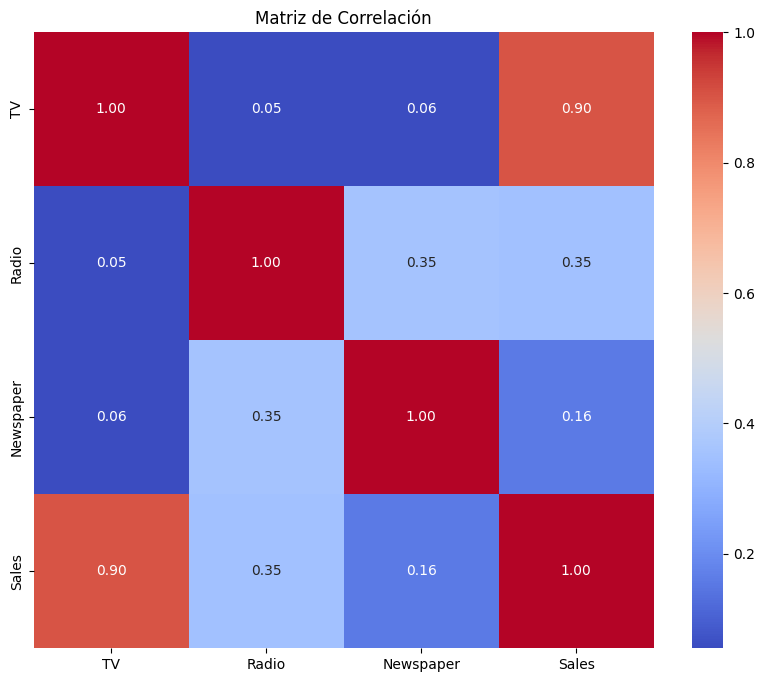

In [21]:
# Correlación y heatmap
#calculo de correlacion
corr_matrix = df.corr()
print("Matriz de correlacion: ")
print(corr_matrix)
#Heatmap o matrix de correlacion
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

**Interpretacion**

* Visualizando el heatmap, se puede observar que la variable TV tiene una correlacion mas fuerte con Sales (aproximadamente 0.9), l oque ocnfirma que la inversion en la TV tiene mayor impacto directo en las ventas.

* Radio tambien presenta una correlacion positiva pero un poco mas moderada con la variable Sales.

* Newpaper tiene una correlacion muy baja con la variable Sales. Lo que su correlacion es practicamente nula.

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

VIF para cada variable: 
    Variable       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


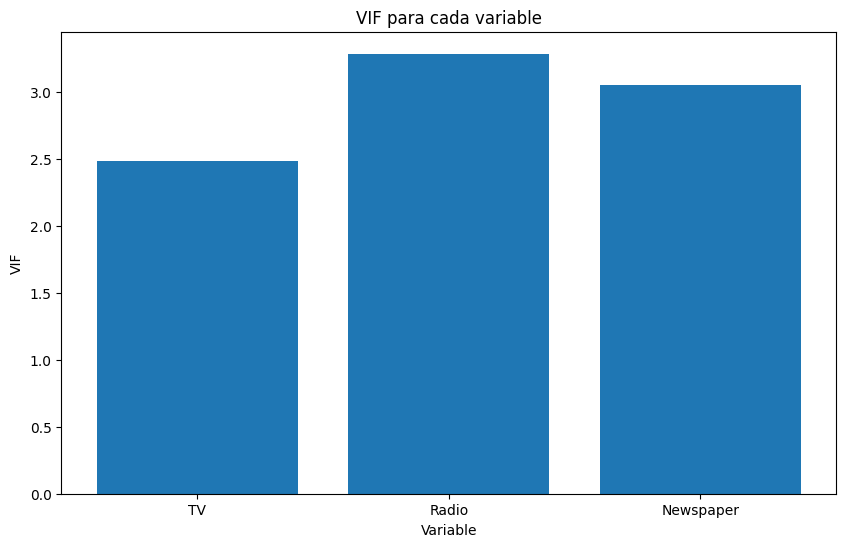

In [22]:
#Multicolinealidad
#Calculo del VIF para cada variable
X = df[['TV', 'Radio', 'Newspaper']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF para cada variable: ")
print(vif_data)

#Crea un diagrama de barras para mostrar el VIF
plt.figure(figsize=(10,6))
plt.bar(vif_data["Variable"], vif_data["VIF"])
plt.xlabel("Variable")
plt.ylabel("VIF")
plt.title("VIF para cada variable")
plt.show()

**Interpretacion**

* El VIF mide cuanto una variable esta relacionada con las demas variables del modelo. En este caso, el valor de VIF < 5, lo que significa que las variables TV, Radio y Newspaper muestran valores bajos (cercanos a 1), lo que significa que cada variable aporta informacion independiente.  

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [23]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
#Entrenar modelo de regresion lineal multiple usando las variables independientes
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

modelo = LinearRegression()
modelo.fit(X,y)

#Imprimir el intercepto y los coeficientes del modelo
intercepto = modelo.intercept_
coeficientes = modelo.coef_
print(f'Intercepto: {intercepto:.4f}')
print(f'Coeficientes: {coeficientes}')



Intercepto: 4.6251
Coeficientes: [0.05444578 0.10700123 0.00033566]


**Interpretacion**

* El modelo regresion lineal multiple utiliza 3 variables (TV, Radio, y Newspaper) y estamos tratando de explicar las ventas.

* El intercepto (4.6251) representa el valor estimado de ventas cuando no hay inversion en ninguno de los tres medios. Aunque no tiene mucho sentido en la practica ya que queremos saber que relacion es la mejor inversion, pero sirve como punto de referencia para la ecuacion.

* Coeficiente de TV: Indica cuanto aumentan las ventas cuando se inverte en TV. Su valor es positivo e indica que la television tiene u nfuerte impacto en las ventas.

* Coeficiente de Radio: Tambien tiene una relacion positiva con las ventas, aunque su efecto es menor comparado con la variable TV.

* Coeficiente Newspaper: Tiene un efecto muy bajo y de hecho el valor es casi nulo.

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

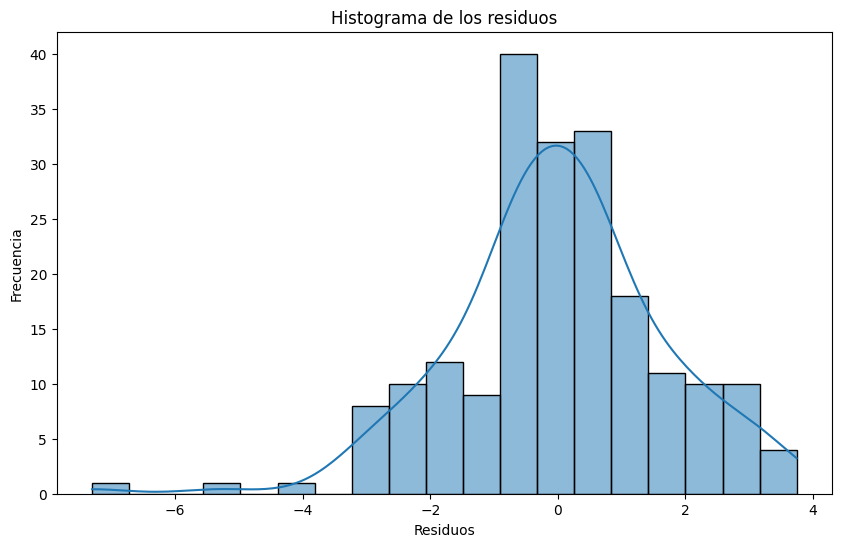

In [24]:
#Normalidad de los residuos
#Calculo de los residuos
y_pred = modelo.predict(X)
residuos = y - y_pred

#Graficar un histograma con KDE de los residuos
plt.figure(figsize=(10,6))
sns.histplot(residuos, kde=True)
plt.title('Histograma de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

* Los residuos son la diferencia entre las ventas reales y las que el modelo esta prediciendo.

* En el histograma se ve que la mayoría de los residuos estan cerca de cero y la forma del gráfico parece normal, aunque no es perfecta la distribucion.

* Esto quiere decir que los errores se reparten más o menos de manera normal, así que el modelo cumple bien con este supuesto.

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

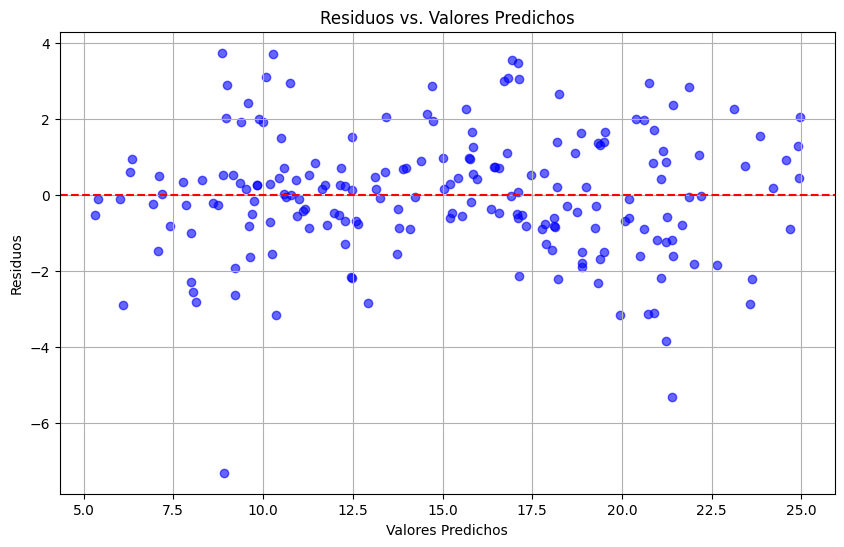

In [30]:
# Homocedasticidad
#Grafico de los residuos contra los valores predichos
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuos, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

**Interpretacion**

* En el grafico se puede observar que los residuos estan distribuidos alrededor de la linea roja (cero) sin formar ningun patron claro.

* Esto indica que los errores del modelo se dispersan de forma aleatoria, lo cual es bueno por que significa que el modelo cumple con el supuesto de homocedasticidad o que ayuda a confiar en el modelo ya que comete errores de tamaño similar en todos los niveles de los datos.

* Las predicciones entonces son estables y confiables.

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

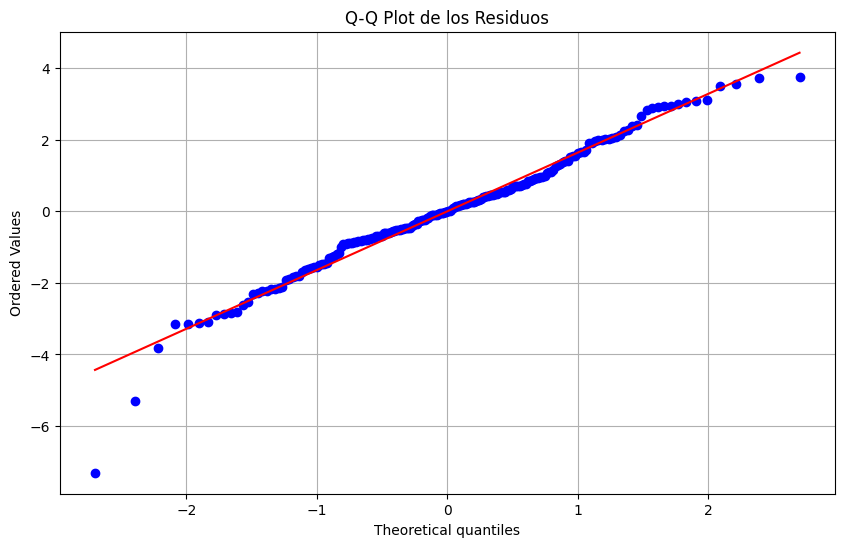

In [32]:
#Q-Q Plot
#Grafico de Q-Q Plot
plt.figure(figsize=(10,6))
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los Residuos')
plt.grid(True)
plt.show()

**Interpretacion**

* El grafico muestra que los puntos se alinean bastante sobre la linea de la diagonal que representa la distribucion normal o comportamiento ideal.

* Los puntos cercanos a la linea de referencia confirman que los errores de distribuyen de forma normal.

* Los residuos se comportan de manera normal y el modelo parece ajustarse bien a los datos

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [34]:
#Evaluación del Modelo
# Calcular metricas
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Imprimir las metricas
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 2.7060
RMSE: 1.6450
R²: 0.9026


**Interpretacion**

* MSE: Mide el promedio de las prediccioens para saber que tan lejos estan con respecto a los valores reales. En este caso, el valor del MSE es bajo, lo que significa que las prediccioens estan bastan a las ventas reales.

* RMSE: El RMSE tambien representa el error promedio del modelo, pero en las mismas unidades que la variable Sales. En este caso, el RSME es cercano a 1.7 lo que significa que el modelo se equivoco por aproximadamente de 1,700. Mientras mas bajo sea este valor, mejor.

* R²: En este caso R² nos indica que tan bien las variables explican las ventas.
Con un valor de R² = 0.90 significa que el 90% de la variacion en las ventas se explica por las inversiones en TV, Radio y Newspaper.

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

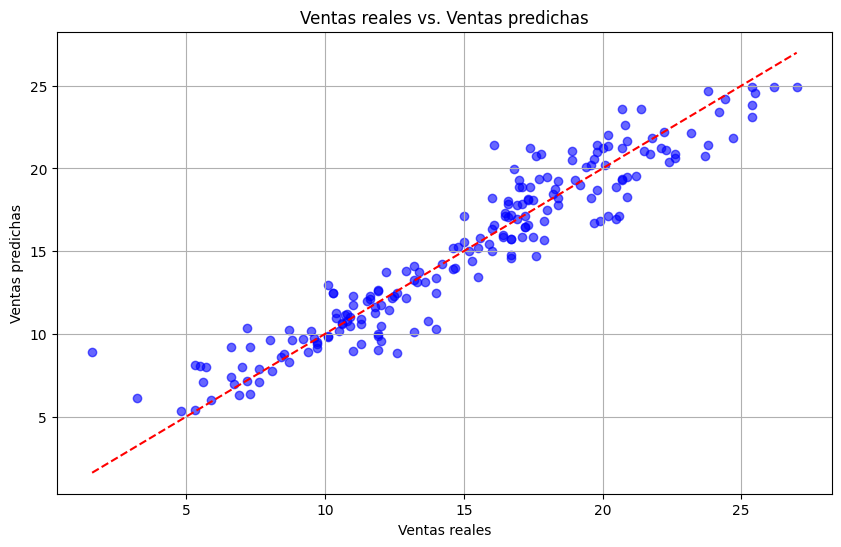

In [36]:
#Visualización de las Predicciones
#Grafico de comparacion entre Sales reales vs Sales predichas.
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(),y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Ventas reales vs. Ventas predichas')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.grid(True)
plt.show()

**Interpretacion**

* El grafico muestra que la mayoria de los puntos estan cerca de la linea de referencia, lo que demuestra que las predicciones del modelo son bastantes precisas.

* Silos puntos se alejan mucho de la linea, entonces podemos decir que el modelo se equivoco mas en esos casos, pero aqui las diferencias son pequeñas.

* El modelo de regresion se ajusta bien a los datos reales.

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [41]:
#P-values
#Afgregar el intercepto
X_stats = sm.add_constant(X)
#Ajustar el modelo con statmodels
modelo_sm = sm.OLS(y, X_stats).fit()
#Imprimir los resultados
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        01:50:49   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

**Interpretacion**

* En la tabla de OLS regression results, los valores de la columna P>\|t| muestran la significancia estadistica de cada variable.

* El criterio comun en la practica es:
  * Si p< 0.05 la variable tiene un efecto significativo en las ventas
  * Si p> 0.05 no es estadisticamente significativo.

* En este modelo las variable TV y Radio si tienen un p-value menores a 0.05, por lo tanto si influyen significativamente en las ventas.Newspaper tiene un p-value mucho mayor a 0.05 lo que indica que tiene un efecto estadistico fuerte en las ventas.

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

Intercepto: 6.2347

Coeficientes del modelo:
    Variable  Coeficiente
0         TV     0.055091
1  Newspaper     0.026021


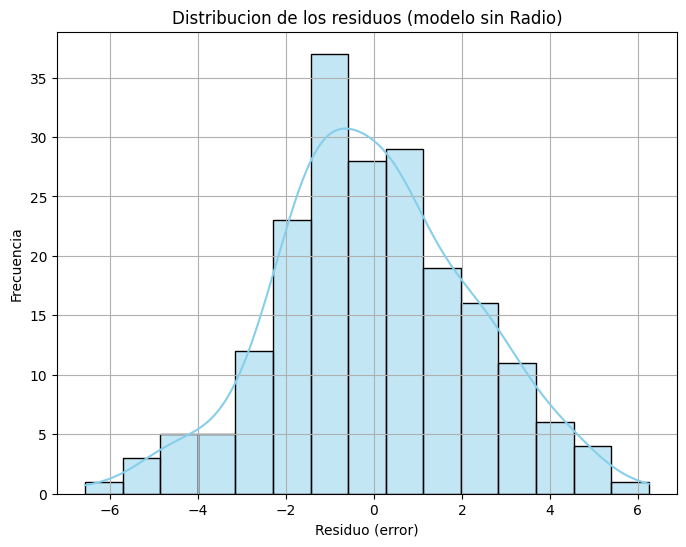

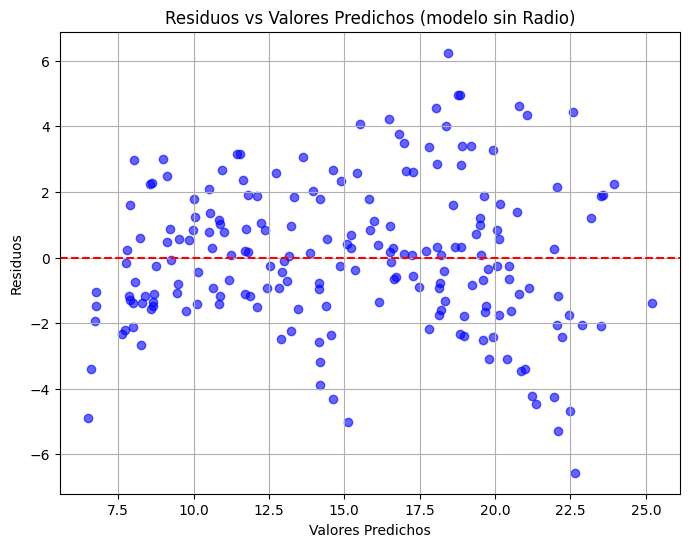

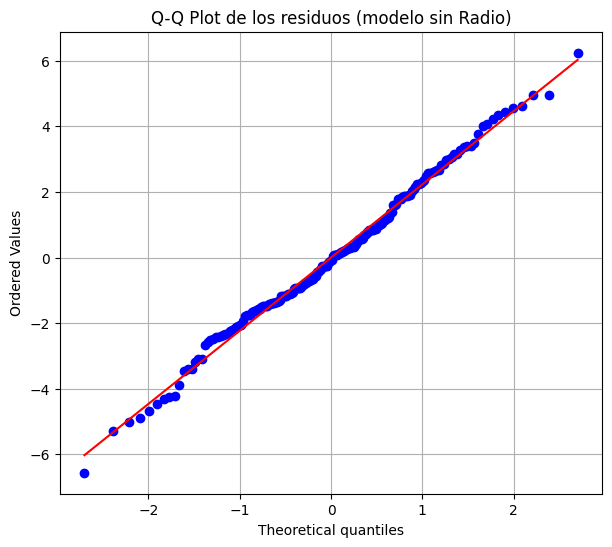

MSE: 4.8992
RMSE: 2.2134
R2: 0.8236


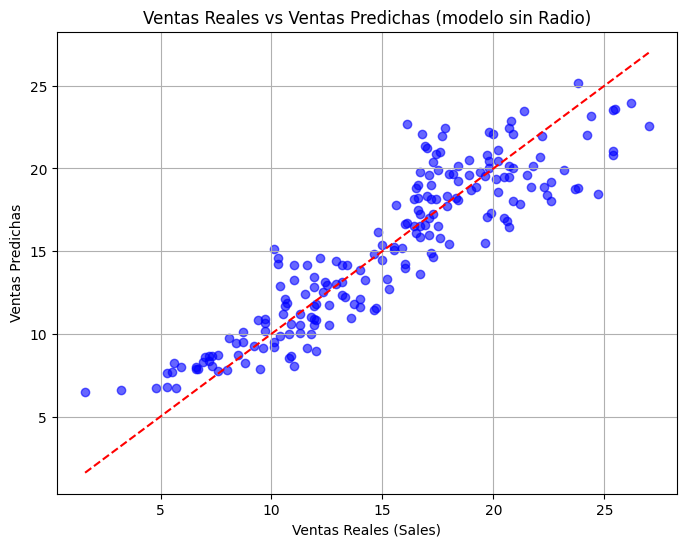

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     460.0
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           5.89e-75
Time:                        02:19:10   Log-Likelihood:                -442.70
No. Observations:                 200   AIC:                             891.4
Df Residuals:                     197   BIC:                             901.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2347      0.375     16.607      0.0

In [44]:
# Entrenamiento del modelo sin Radio
X_sin_radio = df[['TV', 'Newspaper']]
y = df['Sales']

modelo2 = LinearRegression()
modelo2.fit(X_sin_radio, y)

intercepto2 = modelo2.intercept_
coef2 = pd.DataFrame({'Variable': X_sin_radio.columns, 'Coeficiente': modelo2.coef_})
print(f'Intercepto: {intercepto2:.4f}\n')
print('Coeficientes del modelo:')
print(coef2)


# Calcular residuos y valores predichos
y_pred2 = modelo2.predict(X_sin_radio)
residuos2 = y - y_pred2

# Histograma de residuos
plt.figure(figsize=(8,6))
sns.histplot(residuos2, kde=True, color='skyblue', bins=15)
plt.title('Distribucion de los residuos (modelo sin Radio)')
plt.xlabel('Residuo (error)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# Grafico de homocedasticidad
plt.figure(figsize=(8,6))
plt.scatter(y_pred2, residuos2, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos (modelo sin Radio)')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


# Q-Q Plot de los residuos
plt.figure(figsize=(7,6))
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos (modelo sin Radio)")
plt.grid(True)
plt.show()


# Evaluacion del modelo
mse2 = mean_squared_error(y, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y, y_pred2)
print(f"MSE: {mse2:.4f}")
print(f"RMSE: {rmse2:.4f}")
print(f"R2: {r2_2:.4f}")


# Visualizacion de predicciones
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred2, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Ventas Reales vs Ventas Predichas (modelo sin Radio)')
plt.xlabel('Ventas Reales (Sales)')
plt.ylabel('Ventas Predichas')
plt.grid(True)
plt.show()


# Analisis de significancia con statsmodels
X_stats2 = sm.add_constant(X_sin_radio)
modelo_sm2 = sm.OLS(y, X_stats2).fit()
print(modelo_sm2.summary())


**Interpretacion**

* En la parte 3 no se detectaron variables con multicolinealidad fuerte, ya que todos los valores de VIF fueron menores a 5.

* Aun asi, se elimino Radio por tener el VIF mas alto (3.28) para probar si el modelo mejoraba.

* El nuevo modelo con TV y Newspaper mostro un R2 ligeramente menor, lo que indica que el ajuste empeoro un poco.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

Intercepto: 4.6309

Coeficientes del modelo:
  Variable  Coeficiente
0       TV     0.054449
1    Radio     0.107175


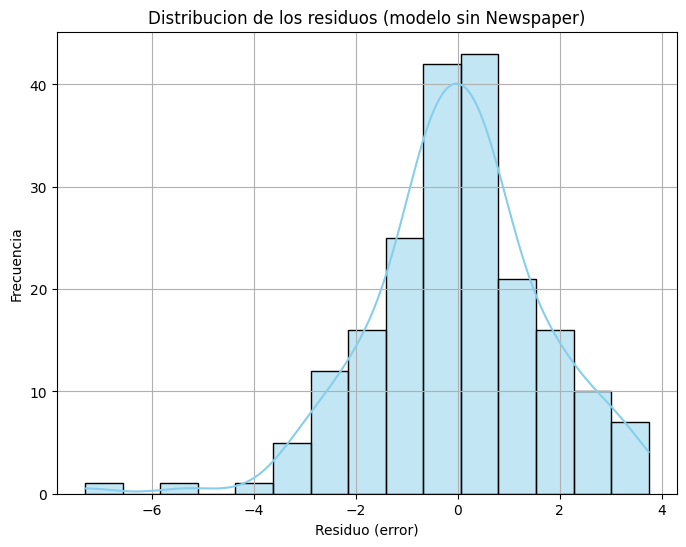

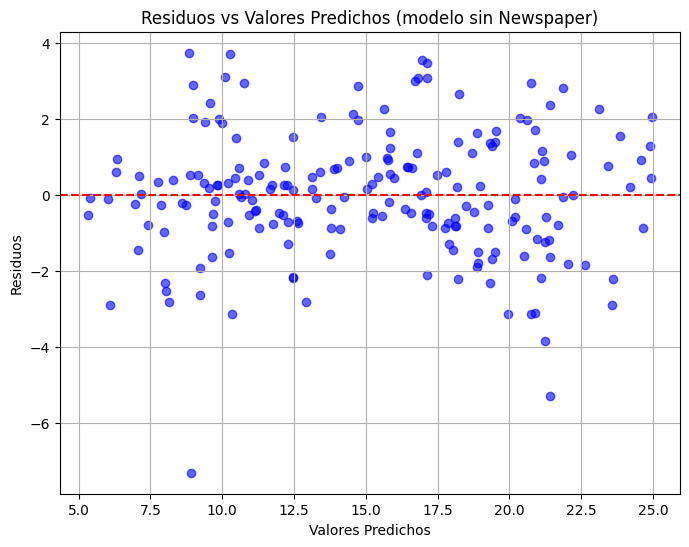

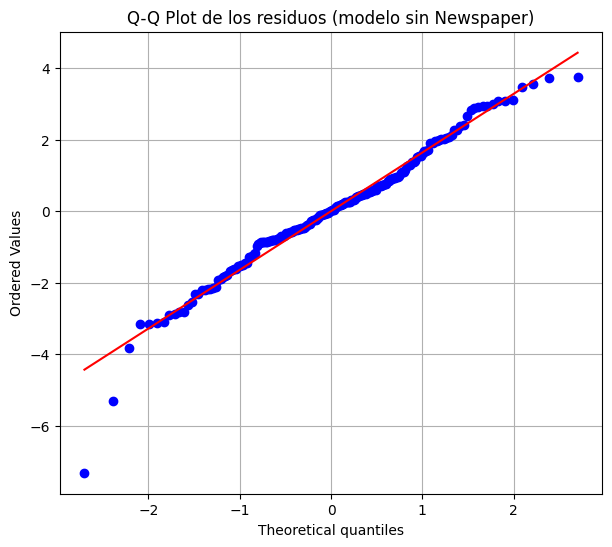

MSE: 2.7061
RMSE: 1.6450
R2: 0.9026


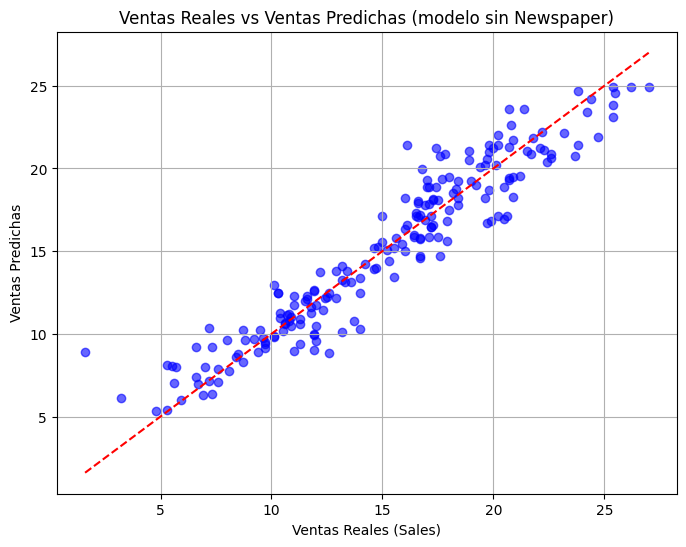

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        02:08:28   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

In [42]:
# Entrenamiento del modelo sin Newspaper
X_lineal = df[['TV', 'Radio']]
y = df['Sales']

modelo3 = LinearRegression()
modelo3.fit(X_lineal, y)

intercepto3 = modelo3.intercept_
coef3 = pd.DataFrame({'Variable': X_lineal.columns, 'Coeficiente': modelo3.coef_})
print(f'Intercepto: {intercepto3:.4f}\n')
print('Coeficientes del modelo:')
print(coef3)

# Calcular los residuos y valores predichos
y_pred3 = modelo3.predict(X_lineal)
residuos3 = y - y_pred3
# Histograma de residuos
plt.figure(figsize=(8,6))
sns.histplot(residuos3, kde=True, color='skyblue', bins=15)
plt.title('Distribucion de los residuos (modelo sin Newspaper)')
plt.xlabel('Residuo (error)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Grafico de homocedasticidad
plt.figure(figsize=(8,6))
plt.scatter(y_pred3, residuos3, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos (modelo sin Newspaper)')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# Q-Q Plot de los residuos
plt.figure(figsize=(7,6))
stats.probplot(residuos3, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos (modelo sin Newspaper)")
plt.grid(True)
plt.show()

# Evaluacion del modelo
mse3 = mean_squared_error(y, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y, y_pred3)
print(f"MSE: {mse3:.4f}")
print(f"RMSE: {rmse3:.4f}")
print(f"R2: {r2_3:.4f}")

# Visualizacion de predicciones
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred3, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Ventas Reales vs Ventas Predichas (modelo sin Newspaper)')
plt.xlabel('Ventas Reales (Sales)')
plt.ylabel('Ventas Predichas')
plt.grid(True)
plt.show()

# Analisis de significancia con statsmodels
X_stats3 = sm.add_constant(X_lineal)
modelo_sm3 = sm.OLS(y, X_stats3).fit()
print(modelo_sm3.summary())


**Interpretacion**

* Para esta seccion se decidio remover la variable Newspaper ya que su interaccion con las ventas no representaban una correlacion lineal muy fuerte. Ademas no mostraba una significancia estadistica.

* TV y Radio mantienen coeficiente positivos, lo que confirma que la mayor inversion viene de estos dos medios.

* Los residuos se distribuyen de forma normal y sin patrones, lo que indica que el modelo cumple con los supuestos.

* Las metricas (MSE, RMSE y R²) siguen siendo casi iguales al modelo anterior, con un R² alto (~0.90), asi que el rendimiento se mantiene casi igual.

##7. Conclusiones.

* ¿Cuál de los tres modelos construidos fue el mejor?
    * El mejor modelo fue el que elimino Newspaper, ya que mantuvo un R2 alto (alrededor de 0.90) y un buen ajuste, pero con menos variables y mayor simplicidad.El modelo sin la variable Radio tuvo un peor desempeño, lo que confirma que Radio es importante para predecir las ventas.

* ¿Cuál fue el atributo que mas influencia tiene en las ventas?
    * El atributo con mayor influencia en las ventas fue TV, seguido de Radio, ambos con coeficientes positivos y p-values menores a 0.05. Newspaper tuvo un impacto minimo, por lo que no aporta informacion significativa al modelo.